# Project Template (Notebook Version)

©2018 Created by Yiming Peng and Bing Xue

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Train

### Description:
The train.py is to build your CNN model, train the model, and save it for later evaluation(marking)
This is just a simple template, you feel free to change it according to your own style.
However, you must make sure:
1. Your own model is saved to the directory "model" and named as "model.h5"
2. The "test.py" must work properly with your model, this will be used by tutors for marking.
3. If you have added any extra pre-processing steps, please make sure you also implement them in "test.py" so that they can later be applied to test images.



In [ ]:
# Import modules
from tensorflow.keras import backend as K
import os
import numpy as np
import tensorflow as tf
import random
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import keras
from tensorflow.keras import layers,models,regularizers
from tensorflow.keras.models import Sequential,save_model,load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D,Input, BatchNormalization, Activation, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [ ]:
# SEED
SEED = 309
np.random.seed(SEED)
random.seed(SEED)

### Data Loading and Preprocessing

In [ ]:
base_path = 'drive/My Drive/Colab Notebooks/Fruit/'
train_dir = 'drive/My Drive/Colab Notebooks/Fruit/train_data/'
test_dir = 'drive/My Drive/Colab Notebooks/Fruit/test_data/'

In [ ]:
# Normalize the pixels in the train data images, resize and augment the data.
train_datagen = ImageDataGenerator(
    rescale=1./255,# The image augmentaion function in Keras
    shear_range=0.2,
    zoom_range=0.2, # Zoom in on image by 20%
    horizontal_flip=True,
    validation_split=0.2) # Flip image horizontally 

# Normalize the test data imagees, resize them but don't augment them
test_datagen = ImageDataGenerator(rescale=1./255) 

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=128,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training')

Found 2880 images belonging to 3 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=128,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
)

Found 720 images belonging to 3 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    color_mode='grayscale',
    batch_size=128,
    class_mode='categorical')

Found 900 images belonging to 3 classes.


### EDA

In [ ]:
# List the classes and their encoded number
train_generator.class_indices

{'cherry': 0, 'strawberry': 1, 'tomato': 2}

In [ ]:
# Check the data distribution in each classs in the training set
print('Training Data')
for direc in os.listdir(train_dir):
    print(direc, ':',len(os.listdir(train_dir+direc)))

Training Data
cherry : 1200
strawberry : 1200
tomato : 1200


In [ ]:
# Check the data distribution in each classs in the test set
print('Test Data')
for direc in os.listdir(test_dir):
    print(direc, ':',len(os.listdir(test_dir+direc)))

Test Data
cherry : 300
tomato : 300
strawberry : 300


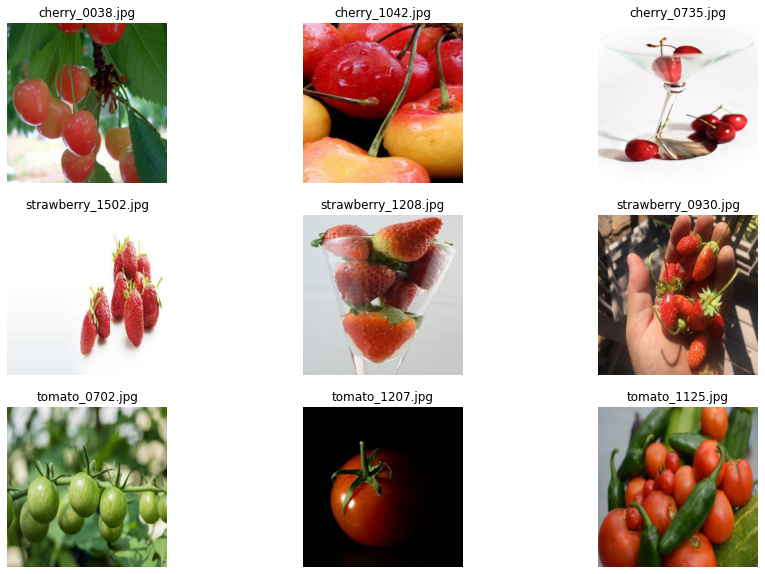

In [ ]:
# Display the data in the training set

fig, axs = plt.subplots(3, 3)
fig.set_size_inches(15,10, forward=True)

disp_images = []
row = 0
for direc in os.listdir(train_dir):
    img_path = os.listdir(train_dir + direc)
    for i in range(3):
        img = Image.open(train_dir + direc + '/' + img_path[i])
        axs[row, i].imshow(img)
        axs[row, i].set_title(img_path[i])
        axs[row, i].axis('off')
    row += 1
plt.show()

In [ ]:
def save_model_h5(model,name):
    """
    Save the keras model for later evaluation
    :param model: the trained CNN model
    :return:
    """
    # ***
    #   Please remove the comment to enable model save.
    #   However, it will overwrite the baseline model we provided.
    # ***
    path = base_path + 'models/' + name + '.h5'
    model.save(path)
    print("Model Saved Successfully.")

### MLP Model

In [ ]:
def train_MLP():
  model = Sequential()
  model.add(Input(shape=(100,100)))
  model.add(Flatten())
  model.add(Dense(350, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(train_generator, epochs=50, verbose=1, validation_data = val_generator)
  return history, model

In [ ]:
 history, model_MLP = train_MLP()

Epoch 1/50
23/23 [==============================] - 13s 545ms/step - loss: 3.1598 - accuracy: 0.3385 - val_loss: 1.2497 - val_accuracy: 0.3861
Epoch 2/50
23/23 [==============================] - 12s 505ms/step - loss: 1.1871 - accuracy: 0.3642 - val_loss: 1.1733 - val_accuracy: 0.3792
Epoch 3/50
23/23 [==============================] - 12s 507ms/step - loss: 1.1744 - accuracy: 0.3580 - val_loss: 1.0742 - val_accuracy: 0.4069
Epoch 4/50
23/23 [==============================] - 12s 500ms/step - loss: 1.0926 - accuracy: 0.3896 - val_loss: 1.1017 - val_accuracy: 0.3653
Epoch 5/50
23/23 [==============================] - 11s 495ms/step - loss: 1.0883 - accuracy: 0.3927 - val_loss: 1.0939 - val_accuracy: 0.3736
Epoch 6/50
23/23 [==============================] - 12s 502ms/step - loss: 1.1129 - accuracy: 0.3854 - val_loss: 1.0964 - val_accuracy: 0.3736
Epoch 7/50
23/23 [==============================] - 11s 490ms/step - loss: 1.1106 - accuracy: 0.3903 - val_loss: 1.0963 - val_accuracy: 0.3764

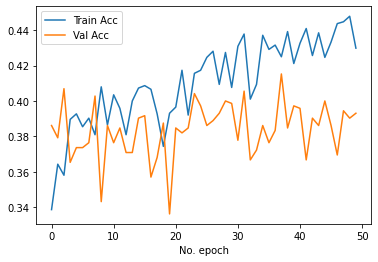

In [ ]:
# Lets Plot the results
plt.plot(history.history['accuracy'],label='Train Acc')
#plt.plot(history.history['loss'], label='Train Loss')
#plt.plot(history.history['val_loss'], label='Val Loss')
plt.plot(history.history['val_accuracy'],label='Val Acc')
plt.legend()
plt.xlabel('No. epoch')
plt.show()

In [ ]:
save_model_h5(model_MLP,'MLP2')

Model Saved Successfully.


### Base CNN

In [ ]:
def construct_model_base_cnn():
  """
  Construct the CNN model.
  ***
      Please add your model implementation here, and don't forget compile the model
      E.g., model.compile(loss='categorical_crossentropy',
                          optimizer='sgd',
                          metrics=['accuracy'])
      NOTE, You must include 'accuracy' in as one of your metrics, which will be used for marking later.
  ***
  :return: model: the initial CNN model
  """
  model = Sequential()
  model.add(Input(shape=(100,100,1)))
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
  return model

In [ ]:
def train_model_base_model(model):
    """
    Train the CNN model
    ***
        Please add your training implementation here, including pre-processing and training
    ***
    :param model: the initial CNN model
    :return:model:   the trained CNN model
    """
    # Add your code here
    history = model.fit(train_generator, epochs=50, verbose=1, validation_data = val_generator)
    return history, model

In [ ]:
model = construct_model_base_cnn()
history_base_cnn,model_base_cnn = train_model_base_model(model)

Epoch 1/50
23/23 [==============================] - 12s 536ms/step - loss: 1.0980 - accuracy: 0.3410 - val_loss: 1.0918 - val_accuracy: 0.3569
Epoch 2/50
23/23 [==============================] - 12s 513ms/step - loss: 1.0927 - accuracy: 0.3774 - val_loss: 1.0936 - val_accuracy: 0.4111
Epoch 3/50
23/23 [==============================] - 12s 510ms/step - loss: 1.0906 - accuracy: 0.3712 - val_loss: 1.0850 - val_accuracy: 0.4222
Epoch 4/50
23/23 [==============================] - 12s 501ms/step - loss: 1.0877 - accuracy: 0.3868 - val_loss: 1.0810 - val_accuracy: 0.4347
Epoch 5/50
23/23 [==============================] - 11s 496ms/step - loss: 1.0844 - accuracy: 0.4010 - val_loss: 1.0832 - val_accuracy: 0.4083
Epoch 6/50
23/23 [==============================] - 12s 501ms/step - loss: 1.0813 - accuracy: 0.4208 - val_loss: 1.0765 - val_accuracy: 0.4375
Epoch 7/50
23/23 [==============================] - 12s 502ms/step - loss: 1.0801 - accuracy: 0.4038 - val_loss: 1.0752 - val_accuracy: 0.4319

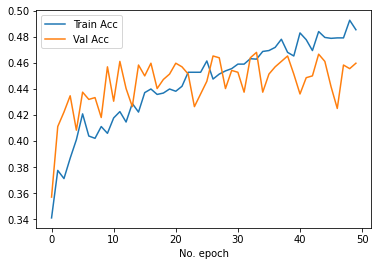

In [ ]:
# Lets Plot the results
plt.plot(history_base_cnn.history['accuracy'],label='Train Acc')
#plt.plot(history.history['loss'], label='Train Loss')
#plt.plot(history.history['val_loss'], label='Val Loss')
plt.plot(history_base_cnn.history['val_accuracy'],label='Val Acc')
plt.legend()
plt.xlabel('No. epoch')
plt.show()

In [ ]:
save_model_h5(model_base_cnn,'base_cnn')

Model Saved Successfully.


### Optimized CNN

In [ ]:
def construct_model_opti_cnn():
  """
  Construct the CNN model.
  ***
      Please add your model implementation here, and don't forget compile the model
      E.g., model.compile(loss='categorical_crossentropy',
                          optimizer='sgd',
                          metrics=['accuracy'])
      NOTE, You must include 'accuracy' in as one of your metrics, which will be used for marking later.
  ***
  :return: model: the initial CNN model
  """
  model = Sequential()
  model.add(Input(shape=(100,100,1)))
  model.add(Conv2D(24, (3, 3), padding = "same", activation='relu', kernel_regularizer=regularizers.l1(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(32, (3, 3), padding = "same",activation='relu', kernel_regularizer=regularizers.l1(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(64, (3, 3), padding = "same",activation='relu', kernel_regularizer=regularizers.l1(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.3))

  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
  model.add(Dropout(0.3))
  model.add(Dense(3, activation="softmax"))
  model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])
  return model

In [ ]:
def train_model_opti_cnn(model):
    """
    Train the CNN model
    ***
        Please add your training implementation here, including pre-processing and training
    ***
    :param model: the initial CNN model
    :return:model:   the trained CNN model
    """
    # Add your code here
    history = model.fit(train_generator, epochs=50, verbose=1)
    return history, model

In [ ]:
model = construct_model_opti_cnn()
history_opti_cnn,model_opti_cnn = train_model_opti_cnn(model)

Epoch 1/50
23/23 [==============================] - 9s 379ms/step - loss: 155.9254 - accuracy: 0.3830
Epoch 2/50
23/23 [==============================] - 9s 388ms/step - loss: 139.2889 - accuracy: 0.3927
Epoch 3/50
23/23 [==============================] - 9s 390ms/step - loss: 122.4353 - accuracy: 0.4007
Epoch 4/50
23/23 [==============================] - 9s 391ms/step - loss: 106.2209 - accuracy: 0.3875
Epoch 5/50
23/23 [==============================] - 9s 385ms/step - loss: 90.7546 - accuracy: 0.3990
Epoch 6/50
23/23 [==============================] - 9s 381ms/step - loss: 76.3510 - accuracy: 0.4191
Epoch 7/50
23/23 [==============================] - 9s 385ms/step - loss: 63.2224 - accuracy: 0.4313
Epoch 8/50
23/23 [==============================] - 9s 403ms/step - loss: 51.5910 - accuracy: 0.4420
Epoch 9/50
23/23 [==============================] - 9s 412ms/step - loss: 41.6474 - accuracy: 0.4469
Epoch 10/50
23/23 [==============================] - 9s 384ms/step - loss: 32.8674 - ac

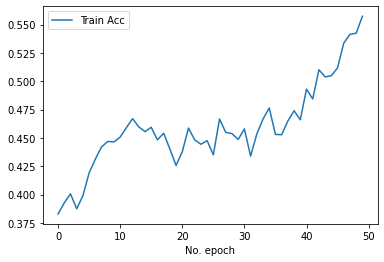

In [ ]:
# Lets Plot the results
plt.plot(history_opti_cnn.history['accuracy'],label='Train Acc')
#plt.plot(history.history['loss'], label='Train Loss')
#plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel('No. epoch')
plt.show()

In [ ]:
save_model_h5(model_opti_cnn,'opti_cnn_2')

Model Saved Successfully.


### Transfer Learning (VGGNet)

In [ ]:
train_generator_inc = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=128,
    color_mode='rgb',
    class_mode='categorical',
    subset='training')

val_generator_inc = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=128,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation'
)

test_generator_inc = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    color_mode='rgb',
    batch_size=128,
    class_mode='categorical')

Found 2880 images belonging to 3 classes.
Found 720 images belonging to 3 classes.
Found 900 images belonging to 3 classes.


In [ ]:
def train_VGG():
  # Always clear the backend before training a model
  K.clear_session()
  # InceptionV3 model and use the weights from imagenet
  conv_base = VGG16(weights = 'imagenet', input_tensor=Input(shape=(128, 128, 3)),
                    include_top = False)

  VGG = conv_base.output
  pool = GlobalAveragePooling2D()(VGG)
  dense_1 = layers.Dense(512, activation = 'relu')(pool)
  output = layers.Dense(3, activation = 'softmax')(dense_1)

  # Define/Create the model for training
  model_VGG = models.Model(inputs=conv_base.input, outputs=output)
  # Compile the model with categorical crossentropy for the loss function and SGD for the optimizer with the learning
  # rate at 1e-4 and momentum at 0.9
  model_VGG.compile(loss='categorical_crossentropy',
                optimizer=SGD(lr=1e-4, momentum=0.9),
                metrics=['accuracy'])
  
  history_vgg = model_VGG.fit(
        train_generator_inc,
        epochs=50,
        verbose = 1,
        validation_data = val_generator_inc)

  return history_vgg,model_VGG

In [ ]:
history_vgg,model_VGG = train_VGG()

Epoch 1/50
23/23 [==============================] - 36s 2s/step - loss: 1.0712 - accuracy: 0.4420 - val_loss: 1.0738 - val_accuracy: 0.4500
Epoch 2/50
23/23 [==============================] - 32s 1s/step - loss: 1.0556 - accuracy: 0.4736 - val_loss: 1.0602 - val_accuracy: 0.4694
Epoch 3/50
23/23 [==============================] - 32s 1s/step - loss: 1.0440 - accuracy: 0.4878 - val_loss: 1.0493 - val_accuracy: 0.4944
Epoch 4/50
23/23 [==============================] - 32s 1s/step - loss: 1.0259 - accuracy: 0.5344 - val_loss: 1.0338 - val_accuracy: 0.5028
Epoch 5/50
23/23 [==============================] - 33s 1s/step - loss: 1.0039 - accuracy: 0.5524 - val_loss: 1.0131 - val_accuracy: 0.5361
Epoch 6/50
23/23 [==============================] - 32s 1s/step - loss: 0.9795 - accuracy: 0.5740 - val_loss: 0.9904 - val_accuracy: 0.5569
Epoch 7/50
23/23 [==============================] - 32s 1s/step - loss: 0.9414 - accuracy: 0.6139 - val_loss: 0.9609 - val_accuracy: 0.5625
Epoch 8/50
23/23 [==

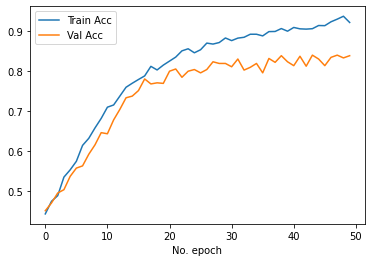

In [ ]:
# Lets Plot the results
plt.plot(history_vgg.history['accuracy'],label='Train Acc')
#plt.plot(history.history['loss'], label='Train Loss')
#plt.plot(history.history['val_loss'], label='Val Loss')
plt.plot(history_vgg.history['val_accuracy'],label='Val Acc')
plt.legend()
plt.xlabel('No. epoch')
plt.show()

In [ ]:
save_model(model_VGG,'VGG')

Model Saved Successfully.


## Test

### Description:
The test.py is to evaluate your model on the test images.

***IMPORTANT***

After you test here with the notebook, you have to make the test.py work properly. Your final submission should include the test.py.

In [ ]:
# Import modules for test
from tensorflow.keras.models import load_model
from tensorflow.python.keras.preprocessing.image import img_to_array
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
import cv2
import os

# Import related functions from test.py

In [ ]:

MLP = load_model(base_path + 'models/MLP2.h5')
base_cnn = load_model(base_path + 'models/base_cnn.h5')
opti_cnn = load_model(base_path + 'models/opti_cnn_2.h5')
VGG = load_model(base_path + 'models/VGG.h5')

In [ ]:
loss, accuracy = MLP.evaluate(test_generator)
print("loss={}, accuracy={}".format(loss, accuracy))

8/8 [==============================] - 372s 46s/step - loss: 1.0822 - accuracy: 0.3956
loss=1.0822312831878662, accuracy=0.3955555558204651


In [ ]:
loss, accuracy = base_cnn.evaluate(test_generator)
print("loss={}, accuracy={}".format(loss, accuracy))

8/8 [==============================] - 2s 224ms/step - loss: 1.0182 - accuracy: 0.4844
loss=1.0181689262390137, accuracy=0.48444443941116333


In [ ]:
loss, accuracy = opti_cnn.evaluate(test_generator)
print("loss={}, accuracy={}".format(loss, accuracy))

8/8 [==============================] - 2s 254ms/step - loss: 2.1955 - accuracy: 0.4822
loss=2.195474624633789, accuracy=0.48222222924232483


In [ ]:
loss, accuracy = VGG.evaluate(test_generator_inc)
print("loss={}, accuracy={}".format(loss, accuracy))

8/8 [==============================] - 2s 257ms/step - loss: 0.4022 - accuracy: 0.8533
loss=0.4021793603897095, accuracy=0.8533333539962769
